In [3]:
from spso2006DNF import SpsoDNF
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


*Model CNFT (dvs false)*
scenario = "WorkingMemoryShift"
stats = "StatsTracking2"
model = "ModelDNF"
evaluationParamsDict = dict(timeEnd=40,allowedTime=4.0)
100:0.30165469958969493:{'iExc': 0.74158049663122683, 'model': 'cnft', 'activation': 'step', 'dt': 0.1, 'lateral': 'step', 'wInh': 0.40128876631551308, 'wExc': 0.08415935969665897, 'size': 49, 'wrap': False, 'iInh': 0.079479754634612529, 'dim': 2, 'h': -0.02780258101218773, 'tau': 0.27979777986747079}

*Model spike (dvs false)*
100:0.018417099846140244:{'lateral': 'step', 'wrap': False, 'size': 49, 'h': -0.064919420916599066, 'dt': 0.1, 'model': 'spike', 'dim': 2, 'wExc': 0.15964138085799076, 'activation': 'step', 'wInh': 0.42983915834176423, 'tau': 0.13899812811987022, 'iInh': 0.034460045330139001, 'iExc': 0.084328655126295504}


In [2]:
listParam = ["iExc","iInh","wExc","wInh","h","tau"]
bounds = (np.array([0,0,1e-3,1e-3,-1.0,1e-3]), np.array([5,1,1,2.0,0.0,1.0]))


In [8]:
def transformIndiv(indiv):
    """return the parameters dictionary which will be given to the model""" 
    # listGen = ["iExc","ik = iInh/iExc","wK=wExc/wInh","wInh","th"
    paramList = np.copy(indiv)
    paramList[1] = indiv[1]*indiv[0]
    paramList[2] = indiv[2]*indiv[3]
    return paramList


In [9]:
constantParamsDict = dict(size=49,dt=0.1,dim=2,
                          model='spike',activation='step',lateral="step",
                          wrap=False)


In [13]:
scenario = ["ScenarioRobustness",]
scenarioParamsDict = [dict(dvs=True,thDVS=0.7),]
stats = "StatsTracking2"
model = "ModelDNF"
evaluationParamsDict = dict(timeEnd=20,allowedTime=4.0)

In [14]:
nbRepet = 1
nbEvaluationMax = 120
n=20
k=3
data_k_i = []
for i in range(nbRepet):
    print(i)
    pso = SpsoDNF(evaluationParamsDict=evaluationParamsDict,constantParamsDict=constantParamsDict,n=n,k=k,
                  nbEvaluationMax=nbEvaluationMax,nbThread=4,verbose=1,
                 transformIndiv=transformIndiv,listParam=listParam,bounds=bounds,
                  scenarioName=scenario,statsName=stats,modelName=model,scenarioParamsDict=scenarioParamsDict)
    pso.reset()
    pso.mainLoop()
    fit = pso.epochSummary['fitness']
    topo = pso.epochSummary['topology']
    indivs = pso.epochSummary['bestX']
    for epoch in range(len(fit)):
        x = indivs[epoch]
        data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],
                         x['iExc'],x['iInh'],x['wExc'],x['wInh'],x['h'],x['tau']])
        
        

0
1:1.0:{'h': -0.98376686172727223, 'model': 'spike', 'iInh': 1.2311200070006831, 'wExc': 0.00512947986286334, 'activation': 'step', 'dt': 0.1, 'tau': 0.63016231040279547, 'dim': 2, 'iExc': 3.6216290753791864, 'size': 49, 'wrap': False, 'wInh': 0.011331796133310364, 'lateral': 'step'}
2:1.0:{'h': -0.98376686172727223, 'model': 'spike', 'iInh': 1.2311200070006831, 'wExc': 0.00512947986286334, 'activation': 'step', 'dt': 0.1, 'tau': 0.63016231040279547, 'dim': 2, 'iExc': 3.6216290753791864, 'size': 49, 'wrap': False, 'wInh': 0.011331796133310364, 'lateral': 'step'}
3:1.0:{'h': -0.98376686172727223, 'model': 'spike', 'iInh': 1.2311200070006831, 'wExc': 0.00512947986286334, 'activation': 'step', 'dt': 0.1, 'tau': 0.63016231040279547, 'dim': 2, 'iExc': 3.6216290753791864, 'size': 49, 'wrap': False, 'wInh': 0.011331796133310364, 'lateral': 'step'}
4:1.0:{'h': -0.98376686172727223, 'model': 'spike', 'iInh': 1.2311200070006831, 'wExc': 0.00512947986286334, 'activation': 'step', 'dt': 0.1, 'tau

In [34]:
df = pd.DataFrame(data_k_i,columns=['n','k','i','epoch','fit','topo','iExc','iInh','wExc','wInh','h','tau'])
df.head()

,n,k,i,epoch,fit,topo,iExc,iInh,wExc,wInh,h,tau
0,20,3,0,0,0.7363051870093184,False,2.58126,1.784891,0.529719,0.746344,-0.223509,0.381677
1,20,3,0,1,0.7363051870093184,True,2.58126,1.784891,0.529719,0.746344,-0.223509,0.381677
2,20,3,0,2,0.7363051870093184,True,2.58126,1.784891,0.529719,0.746344,-0.223509,0.381677
3,20,3,0,3,0.7363051870093184,True,2.58126,1.784891,0.529719,0.746344,-0.223509,0.381677
4,20,3,0,4,0.7363051870093184,True,2.58126,1.784891,0.529719,0.746344,-0.223509,0.381677


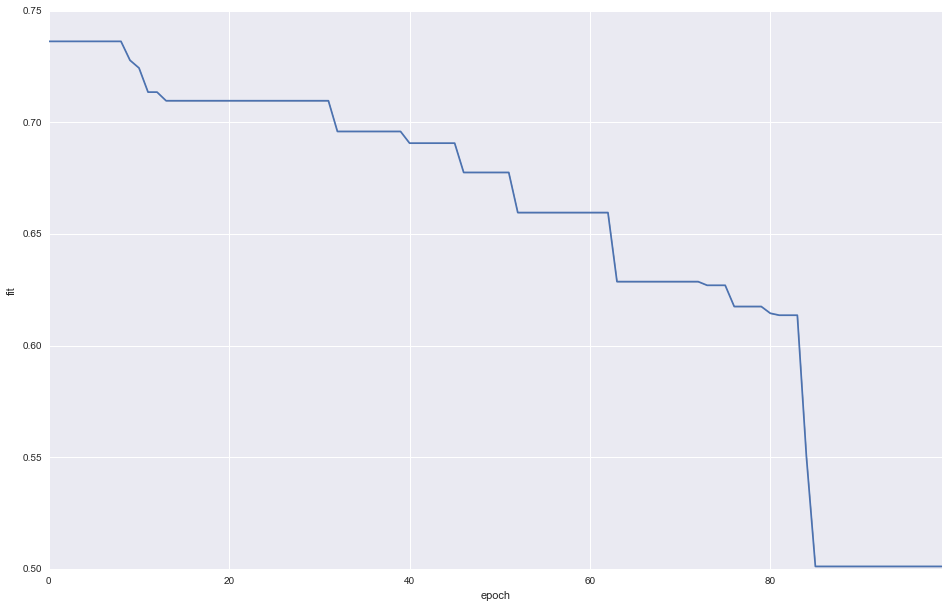

In [35]:
plt.figure(figsize=(16,10))
sns.tsplot(time='epoch',value='fit',unit='i',data=df)


# Test landscape

In [52]:
# pso = SpsoDNF(constantParamsDict=constantParamsDict,n=20,k=3,nbEvaluationMax=100,nbThread=1,verbose=1,
#                  transformIndiv=transformIndiv,listParam=listParam,bounds=bounds)

In [101]:


iE_range = np.linspace(bounds[0][0],bounds[1][0],100)
ik_range = np.linspace(bounds[0][1],bounds[1][1],100)
wk_range = np.linspace(bounds[0][2],bounds[1][2],100)
wI_range = np.linspace(bounds[0][3],bounds[1][3],100)

In [97]:
def params():
    X = {'wExc': 0.045443252813000351, 'iExc': 1.3553446712914161, 'activation': 'step', 'wInh': 0.16691227504420655, 'dim': 2, 'model': 'spike', 'lateral': 'step', 'iInh': 0.048652003699815226, 'wrap': False, 'dt': 0.1, 'size': 49}
    iExc,iInh,wExc,wInh = X['iExc'],X['iInh'],X['wExc'],X['wInh']
    ik = iInh/iExc
    wk = wExc/wInh
    return [iExc,ik,wk,wInh]

In [102]:
# [iExc,ik,wk,wInh] = params()
# wk_f = []
# for wk in  wk_range:
#     fitness = pso.evaluate(pso.indivToParams([iExc,ik,wk,wInh]))
#     wk_f.append(fitness)
    
# [iExc,ik,wk,wInh] = params()
# ik_f = []
# for ik in  ik_range:
#     fitness = pso.evaluate(pso.indivToParams([iExc,ik,wk,wInh]))
#     ik_f.append(fitness)

        
# [iExc,ik,wk,wInh] = params()
# ie_f = []
# for iExc in  iE_range:
#     fitness = pso.evaluate(pso.indivToParams([iExc,ik,wk,wInh]))
#     ie_f.append(fitness)
    
[iExc,ik,wk,wInh] = params()
wi_f = []
for wInh in wI_range:
    fitness = pso.evaluate(pso.indivToParams([iExc,ik,wk,wInh]))
    wi_f.append(fitness)

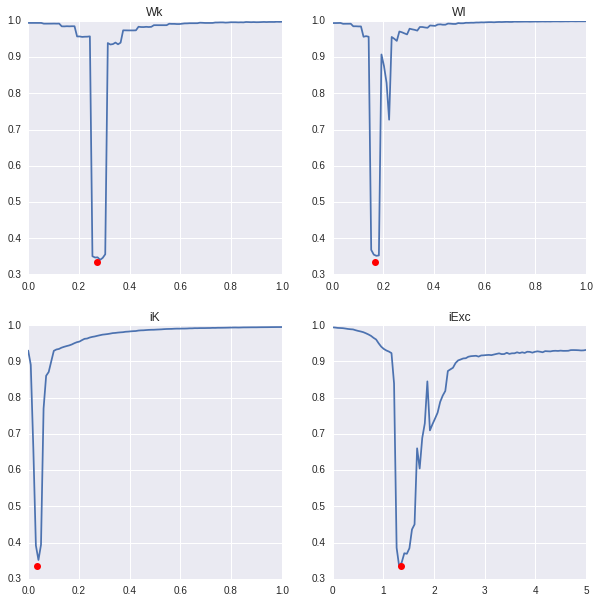

In [107]:
[iExc,ik,wk,wInh] = params()
fit = 0.3355789209247651

plt.figure(figsize=(10,10))
plt.subplot(221)
plt.plot(wk_range,wk_f)
plt.plot(wk,fit,'or')
plt.title("Wk")
plt.subplot(222)
plt.plot(wI_range,wi_f)
plt.plot(wInh,fit,'or')
plt.title("WI")
plt.subplot(223)
plt.plot(ik_range,ik_f)
plt.plot(ik,fit,'or')
plt.title("iK")
plt.subplot(224)
plt.plot(iE_range,ie_f)
plt.plot(iExc,fit,'or')
plt.title("iExc")

# Optimiwation WM

In [4]:
listParam = ["iExc_wm","iInh_wm","wExc_wm","wInh_wm","h_wm","tau_wm","wFocus","wInput"]
bounds = (np.array([0,0,1e-3,1e-3,-1.0,1e-3,0,0]), np.array([5,1,1,2.0,0.0,1.0,1.0,1.0]))


In [5]:
def transformIndiv(indiv):
    """return the parameters dictionary which will be given to the model""" 
    # listGen = ["iExc","ik = iInh/iExc","wK=wExc/wInh","wInh","h",tau,wFocus
    paramList = np.copy(indiv)
    paramList[1] = indiv[1]*indiv[0] 
    paramList[2] = indiv[2]*indiv[3]
    return paramList


In [6]:
constantParamsDict = dict(size=49,dt=0.1,dim=2,
                          model='spike',activation='step',lateral="step",
                          wrap=False,dvs=True)

In [7]:
scenario = "Dual"
stats = "StatsTracking2"
model = "ModelWM"
evaluationParamsDict = dict(timeEnd=40,allowedTime=6.0)

In [ ]:
nbRepet = 1
nbEvaluationMax = 120
n=40
k=3
data_k_i = []
for i in range(nbRepet):
    print(i)
    pso = SpsoDNF(evaluationParamsDict=evaluationParamsDict,constantParamsDict=constantParamsDict,n=n,k=k,
                  nbEvaluationMax=nbEvaluationMax,nbThread=8,verbose=1,
                 transformIndiv=transformIndiv,listParam=listParam,bounds=bounds,
                  scenarioName=scenario,statsName=stats,modelName=model)
    pso.reset()
    pso.mainLoop()
    fit = pso.epochSummary['fitness']
    topo = pso.epochSummary['topology']
    indivs = pso.epochSummary['bestX']
    for epoch in range(len(fit)):
        x = indivs[epoch]
        data_k_i.append([n,k,i,epoch,fit[epoch],topo[epoch],
                         x['iExc_wm'],x['iInh_wm'],x['wExc_wm'],x['wInh_wm'],x['h_wm'],x['tau_wm']])
        
        

0
1:0.6434370492781459:{'wInh_wm': 0.41069203486729022, 'dim': 2, 'wFocus': 0.72727153335389638, 'dvs': True, 'tau_wm': 0.85962770272598932, 'model': 'spike', 'wInput': 0.85386585425064143, 'iExc_wm': 0.16948552655969351, 'wrap': False, 'size': 49, 'lateral': 'step', 'activation': 'step', 'wExc_wm': 0.39661623535073737, 'iInh_wm': 0.13047096078018136, 'dt': 0.1, 'h_wm': -0.096836608573632632}
